###### 2020-10-20 화요일

# visualization_실습

### 목차

#### 1. 문제 01 ]

#### 2. 문제 02 ]

#### 3. 문제 03 ]

#### 4. 문제 04 ]

#### 5. 문제 05 ]

#### 6. 문제 06 ]

#### 7. 문제 07 ]

#### 8. 문제 08 ]

In [1]:
# warning 제거 옵션

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [436]:
# 한글폰트 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)

# 마이너스 깨짐
mpl.rcParams['axes.unicode_minus'] = False

##### `koweps_visualization.xlsx` 데이터 불러오기

In [4]:
koweps_df = pd.read_excel('./실습데이터/koweps_visualization.xlsx')

In [5]:
# 원본데이터에서 복사본 만들기
data_df = koweps_df

In [6]:
data_df.head(10)

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,6,1,1,60101,0,NaN,2347.621959,0.706499,2322.323306,0.698885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5396.0,0,NaN
6,6,1,1,60101,0,NaN,2726.291410,0.820456,2701.699267,0.813056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,6,1,1,60101,0,NaN,1761.380403,0.530074,1713.523417,0.515672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,6,1,1,60101,0,NaN,909.940509,0.273840,907.548817,0.273120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,6,1,1,60101,0,NaN,1025.048024,0.308480,1019.305572,0.306752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


##### `koweps_visualization.xlsx`데이터의 Feature 정보

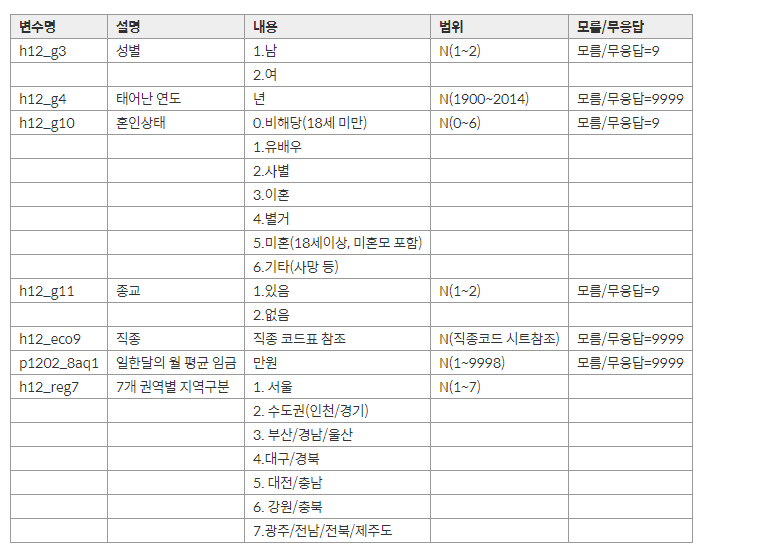

In [7]:
from IPython.display import Image

Image('./실습데이터/koweps_img.PNG')

### 문제 01 ]
   - 해당 데이터프레임에서 사용하고자 하는 칼럼(위 이미지에서 명시된 칼럼)만 추출하고, 사용하기 편한 칼럼 이름으로 rename하라

In [8]:
want_columns_df = data_df[ ['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7'] ]
want_columns_df.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
want_columns_df.head(10)

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


### 문제02 ]
   - 성별 데이터의 분포를 확인하고, 성별을 비율순으로 정렬하라. 그리고 시각화를 하라.
   
   
   
##### 참고 :  `plt.text(x축, y축, 입력할값)`

0 8440
1 6982


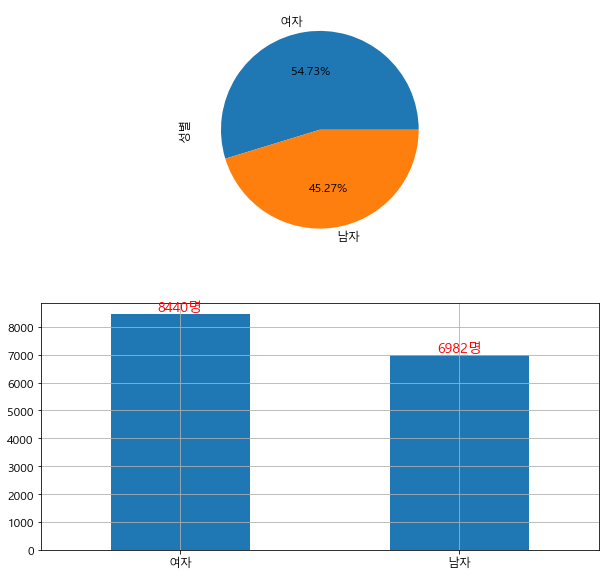

In [9]:
# 남여의 수를 세기
count_gender = want_columns_df['성별'].value_counts()
count_gender.index = ['여자', '남자']

fig, axes = plt.subplots(2, 1)

# 그래프1
# 응답자의 남여 비율 비교 : pie 그래프
count_gender.plot.pie(autopct='%.2f%%', 
                      ax=axes[0])

# 그래프 2
# 응답자의 남여 수 비교 : bar 그래프
count_gender.plot(kind='bar', 
                  ax=axes[1], 
                  rot=0)

for idx, value in enumerate(count_gender):
    print(idx, value)
    txt = '%d명' % value
    
    # plt.text(x축, y축, 입력할값)
    plt.text(idx, value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='red'
            )
plt.grid()
    
    
    

### 문제 03 ] 성별에 따른 평균 급여 차이를 분석
   -  1) '성별'과 '월급' 데이터만 추출하고,
   -  2) [ 1=남 / 2=여 ]인 데이터를 '남성', '여성'으로 만들고,
   -  3) 결측치나 이상치를 확인하고 제거하는 데이터 정제과정을 거친 후,
   -  4) 성별로 그룹화하여 그룹별 평균임금을 구하고, 
   -  5) histogram을 이용해 성별에 따른 임금분포를 확인해보자

In [10]:
#### 1)'성별'과 '일한달의 월 평균 임금'칼럼만 뽑아낸다
two_df = want_columns_df[ ['성별', '일한달의 월 평균 임금'] ]
two_df.head(10)

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
5,1,NaN
6,2,NaN
7,2,NaN
8,1,NaN
9,2,NaN


In [11]:
#### 2) 수치형으로된 '성별'칼럼을 문자화하라 : [ 1=남자 / 2=여자 ]
f = lambda x : '남자' if x == 1 else '여자'
two_df['성별'] = two_df['성별'].apply(f)
two_df.loc[100:120, :]

,성별,일한달의 월 평균 임금
100,남자,173.0
101,여자,NaN
102,남자,600.0
103,남자,265.0
104,여자,NaN
105,남자,NaN
106,여자,158.0
107,남자,NaN
108,여자,NaN
109,남자,NaN


In [12]:
#### 3) 결측치나 이상치를 확인하고 제거하는 데이터 정제과정을 거쳐라
# 이상치
IQR = two_df['일한달의 월 평균 임금'].quantile(q=0.75) - two_df['일한달의 월 평균 임금'].quantile(q=0.25)
lower_bound = two_df['일한달의 월 평균 임금'].quantile(q=0.25) - 1.5 * IQR
upper_bound = two_df['일한달의 월 평균 임금'].quantile(q=0.75) + 1.5 * IQR

no_outlier_index = ( two_df['일한달의 월 평균 임금'] < upper_bound ) | ( two_df['일한달의 월 평균 임금'] > lower_bound )
erase_outlier_df = two_df.loc[ no_outlier_index, : ]

# 결측치
NaN_index = pd.notnull(erase_outlier_df['일한달의 월 평균 임금'])
refine_df = erase_outlier_df.loc[ NaN_index, : ]

refine_df.head()

,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0


,성별에따른 평균 임금
성별,
남자,333.280785
여자,175.293108


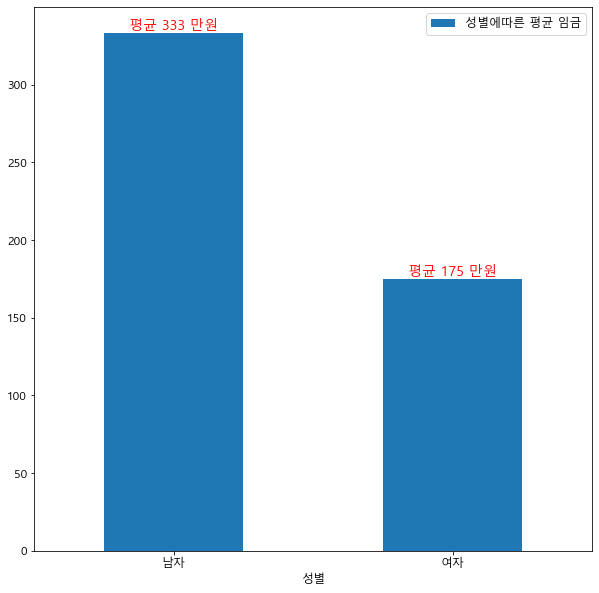

In [13]:
#### 4) 성별로 그룹화 하여 그룹별 평균임금을 구하라.
average_imgeum = refine_df.groupby('성별').agg(np.mean)
average_imgeum.columns = ['성별에따른 평균 임금']
display(average_imgeum.head(10))


average_imgeum.plot(kind='bar', rot=0)
for idx, value in enumerate(average_imgeum['성별에따른 평균 임금']):
    txt = '평균 %d 만원' % value
    plt.text(idx, value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='red')

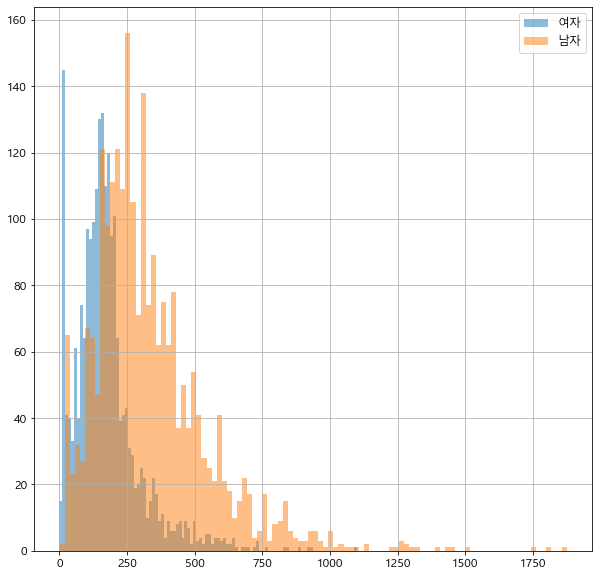

In [14]:
#### 5) histogram을 이용해 성별에 따른 임금분포를 확인하라.
gender_list = ['여자', '남자']
for gender in gender_list:
    use_df = refine_df[ refine_df['성별'] == gender ]
    plt.hist(use_df['일한달의 월 평균 임금'], bins=100, label=gender, alpha=0.5)
plt.legend()
plt.grid()

### 문제 04 ] 나이에 따른 평균급여 변화
   - 1) 태어난 년도, 월급에 대한 칼럼을 추출하고 나이를 계산하여 파생변수를 추가하라.
   - 2) 결측값 확인, 결측치제거, 이상치 결측처리
   - 3) 나이에 따른 급여평균
   - 4) 데이터시각화

In [15]:
# 1) 태어난 년도, 월급에 대한 칼럼을 추출하고 나이를 계산하여 파생변수를 추가하라.
year_imgeum_df = want_columns_df[ ['태어난 연도', '일한달의 월 평균 임금'] ]
year_imgeum_df['만_나이'] = 2020 - year_imgeum_df['태어난 연도'].apply(int)


In [16]:
# 2) 결측값 확인, 결측치 제거, 이상치 결측처리

# 결측값 확인
year_imgeum_df.apply(pd.isnull, axis=0).apply(sum, axis=0)  # '일한달의 월 평균 임금' 칼럼에서만 결측치 확인

# 결측치 제거
no_null_index = pd.notnull(year_imgeum_df['일한달의 월 평균 임금'])
refine_df01 = year_imgeum_df.loc[ no_null_index ,: ]

# 이상치 결측처리
q3 = refine_df01['일한달의 월 평균 임금'].quantile(q=0.75)
q1 = refine_df01['일한달의 월 평균 임금'].quantile(q=0.25)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

for_nan_index = ( refine_df01['일한달의 월 평균 임금'] > upper_bound ) | ( refine_df01['일한달의 월 평균 임금'] < lower_bound )
refine_df01.loc[ for_nan_index, ['일한달의 월 평균 임금'] ] = np.NaN

refine_df01.head(10)

,태어난 연도,일한달의 월 평균 임금,만_나이
3,1942,108.9,78
10,1940,20.0,80
16,1978,322.0,42
17,1975,120.0,45
24,1975,300.0,45
27,1961,100.0,59
29,1986,200.0,34
30,1962,130.0,58
31,1985,150.0,35
36,1971,250.0,49


,태어난 연도,일한달의 월 평균 임금
만_나이,,
22,1998,89.333333
23,1997,136.720000
24,1996,140.807692
25,1995,138.000000
26,1994,145.652000
27,1993,166.666667
28,1992,176.439344
29,1991,179.716471
30,1990,201.438158


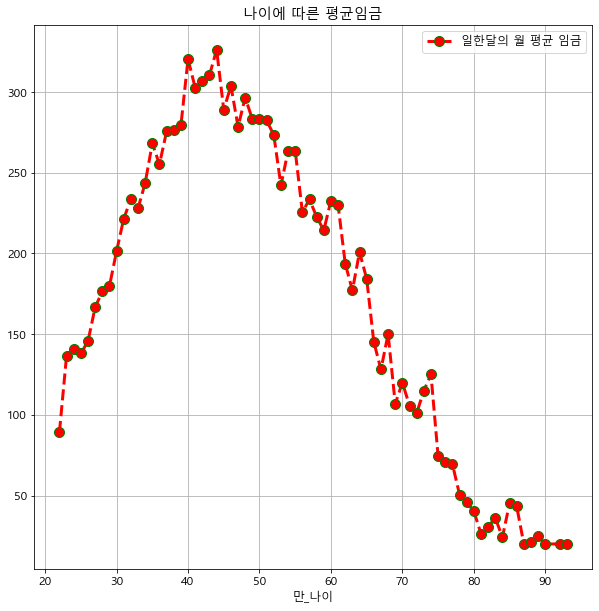

In [17]:
# 3) 나이에 따른 급여평균
imgeum_by_age = refine_df01.groupby('만_나이').agg(np.mean)
display(imgeum_by_age.head(10))


# 4) 데이터시각화
imgeum_by_age[['일한달의 월 평균 임금']].plot(c='red',
                                              lw=3,
                                              ls='--',
                                              marker='o',
                                              ms=10,
                                              mec='g',
                                              mfc='r')
plt.title('나이에 따른 평균임금')
plt.grid()



### 문제 05 ] 연령대에 따른 분포

In [20]:
want_columns_df.head(10)

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


In [54]:
year_df = want_columns_df.filter(['태어난 연도'])
year_df.head(10)

,태어난 연도
0,1936
1,1945
2,1948
3,1942
4,1923
5,1962
6,1963
7,2003
8,1927
9,1934


In [68]:
# 나이구하기
year_df['나이'] = dt.datetime.now().year - year_df['태어난 연도'] + 1
year_df.head(10)

,태어난 연도,나이
0,1936,85
1,1945,76
2,1948,73
3,1942,79
4,1923,98
5,1962,59
6,1963,58
7,2003,18
8,1927,94
9,1934,87


In [69]:
# 연령대 구하기

year_df['연령대'] = ( year_df['나이'] // 10 ) * 10
year_df

,태어난 연도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90
...,...,...,...
15417,1967,54,50
15418,1992,29,20
15419,1995,26,20
15420,1998,23,20


In [70]:
# 결측값 확인
year_df.isna().sum()

# 결측치 없다 ㅎㅎ

태어난 연도    0
나이        0
연령대       0
dtype: int64

In [82]:
# 연령대에 대한 빈도수 확인
age_gen_df = year_df[ ['나이', '연령대'] ].groupby('연령대').count()
age_gen_df.columns = ['연령대 빈도']
age_gen_df

,연령대 빈도
연령대,
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148


In [93]:
age_gen_df2 = pd.DataFrame( { '연령대 빈도' : year_df['연령대'].value_counts() } )
age_gen_df2.sort_index(inplace=True)
age_gen_df2.index.name = '연령대'
age_gen_df2

,연령대 빈도
연령대,
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148


In [94]:
# 인덱스를 의미있는 이름으로 변경

f = lambda x : str(x) + '대'
age_gen_df2.index = pd.Series(map(f, age_gen_df2.index))
age_gen_df2

,연령대 빈도
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


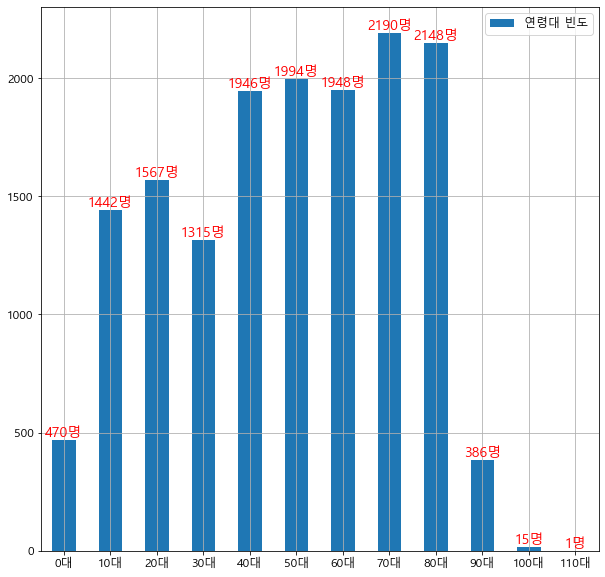

In [103]:
# 시각화하기

# 그래프 그리기
age_gen_df2.plot.bar(rot=0)


# 그래프 텍스트 넣기
for idx, value in enumerate(age_gen_df2['연령대 빈도']):
    txt = str(value) + '명'
    plt.text(idx, value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='red')
plt.grid()

### 문제 06 ] 연령대별 평균 급여 변화

In [149]:
# 연령대별 평균 급여 변화


# 원하는 칼럼 추출
want_df = want_columns_df[['태어난 연도', '일한달의 월 평균 임금']]


# 결측치 제거
want_df.isnull().apply(sum, axis=0)
no_nan_df = want_df.dropna()
no_nan_df.head(10)

,태어난 연도,일한달의 월 평균 임금
3,1942,108.9
10,1940,20.0
16,1978,322.0
17,1975,120.0
24,1975,300.0
27,1961,100.0
29,1986,200.0
30,1962,130.0
31,1985,150.0
36,1971,250.0


In [150]:
# 이상치 처리

# 3분위수 구하기
q1 = no_nan_df['일한달의 월 평균 임금'].quantile(q=0.25)
q3 = no_nan_df['일한달의 월 평균 임금'].quantile(q=0.75)
IQR = q3 - q1

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR


# 이상치 결측치처리
outlier_index = ( no_nan_df['일한달의 월 평균 임금'] > upper_bound ) | ( no_nan_df['일한달의 월 평균 임금'] < lower_bound )
no_nan_df.loc[ outlier_index, '일한달의 월 평균 임금'] = np.NaN


no_nan_df.head(10)

,태어난 연도,일한달의 월 평균 임금
15376,1956,180.0
15377,1956,80.0
15378,1969,NaN
15387,1989,350.0
15388,1986,250.0
15400,1966,230.0
15401,1962,138.0
15404,1993,286.0
15412,1956,179.0
15419,1995,72.0


In [151]:
# '나이' 칼럼 생성
no_nan_df['나이'] = dt.datetime.now().year - no_nan_df['태어난 연도'] + 1

In [152]:
# '연령대' 칼럼 생성
no_nan_df['연령대'] = (no_nan_df['나이'] // 10 ) * 10

# 필요한 칼럼만 추출
for_plot_df = no_nan_df[ ['연령대', '일한달의 월 평균 임금'] ]

,일한달의 월 평균 임금
연령대,
20,154.890476
30,240.025899
40,300.876333
50,260.645143
60,191.040312
70,94.149102
80,35.000000
90,22.000000


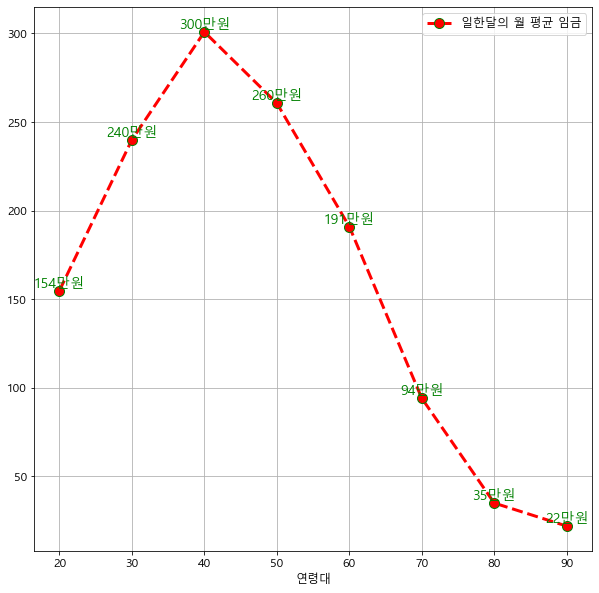

In [437]:
# 연령별 평균 임금 변화율 시각화
plot_df = for_plot_df.groupby('연령대').agg(np.mean)
display(plot_df)

# 그래프그리기
plot_df.plot(c='red',
            lw=3,
            ls='--',
            marker='o',
            ms=10,
            mec='g',
            mfc='r')


# 그래프에 텍스트 넣기
for idx, value in enumerate(plot_df['일한달의 월 평균 임금']):
    txt = str(int(value)) + '만원'
    x = plot_df.index[idx]
    
    plt.text(x, value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='green'
            )
    
plt.grid()

### 문제 07 ] 성별과 연령대 분포
   - 성별을 한글화 하라 [1은 남자, 2는 여자]
   - 이상치, 결측값 처리
   - 성별이 칼럼으로 연령대가 인덱스로 사용되도록 피봇 구성
   - 필요에 따라서 인덱스 이름을 변경해도 된다.

In [185]:
# 원하는 칼럼 추출

temp_df01 = want_columns_df[ ['성별', '태어난 연도', '일한달의 월 평균 임금'] ]
temp_df01.head(10)

,성별,태어난 연도,일한달의 월 평균 임금
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
5,1,1962,NaN
6,2,1963,NaN
7,2,2003,NaN
8,1,1927,NaN
9,2,1934,NaN


In [186]:
# 결측치처리
for_view = temp_df.isnull().apply(sum, axis=0) # 결측치존재
display(for_view)

temp_df02 = temp_df.dropna()
temp_df02.head(10)

성별                  0
태어난 연도              0
일한달의 월 평균 임금    10915
dtype: int64

,성별,태어난 연도,일한달의 월 평균 임금
3,1,1942,108.9
10,2,1940,20.0
16,1,1978,322.0
17,2,1975,120.0
24,1,1975,300.0
27,2,1961,100.0
29,2,1986,200.0
30,2,1962,130.0
31,2,1985,150.0
36,1,1971,250.0


In [188]:
# 이상치 결측처리

q1 = temp_df02['일한달의 월 평균 임금'].quantile(q=0.25)
q3 = temp_df02['일한달의 월 평균 임금'].quantile(q=0.75)
IQR = q3 - q1

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR


outlier_index = ( temp_df02['일한달의 월 평균 임금'] > upper_bound ) | ( temp_df02['일한달의 월 평균 임금'] < lower_bound )

temp_df02.loc[outlier_index, :] = np.NaN
temp_df03 = temp_df02


temp_df03.head(10)

,성별,태어난 연도,일한달의 월 평균 임금
3,1.0,1942.0,108.9
10,2.0,1940.0,20.0
16,1.0,1978.0,322.0
17,2.0,1975.0,120.0
24,1.0,1975.0,300.0
27,2.0,1961.0,100.0
29,2.0,1986.0,200.0
30,2.0,1962.0,130.0
31,2.0,1985.0,150.0
36,1.0,1971.0,250.0


In [190]:
# 나이칼럼생성
temp_df03['나이'] = dt.datetime.now().year - temp_df03['태어난 연도'] + 1

# 연령대 생성
temp_df03['연령대'] = (temp_df03['나이'] // 10) * 10

# 성별 한글화
f = lambda x : '남자' if x==1 else '여자'
temp_df03['성별_한글화'] = temp_df03['성별'].apply(f)


,성별_한글화,나이,연령대,일한달의 월 평균 임금
3,남자,79.0,70.0,108.9
10,여자,81.0,80.0,20.0
16,남자,43.0,40.0,322.0
17,여자,46.0,40.0,120.0
24,남자,46.0,40.0,300.0
27,여자,60.0,60.0,100.0
29,여자,35.0,30.0,200.0
30,여자,59.0,50.0,130.0
31,여자,36.0,30.0,150.0
36,남자,50.0,50.0,250.0


In [255]:
# 피봇 데이터프레임 생성
pivot_df = temp_df03.pivot_table('나이', '연령대', '성별_한글화', aggfunc='count')
pivot_df.columns = ['연령대별_빈도수_남성', '연령대별_빈도수_여성']
pivot_df

,연령대별_빈도수_남성,연령대별_빈도수_여성
연령대,,
20.0,77,175
30.0,432,402
40.0,649,469
50.0,496,484
60.0,318,322
70.0,142,192
80.0,55,82
90.0,1,4


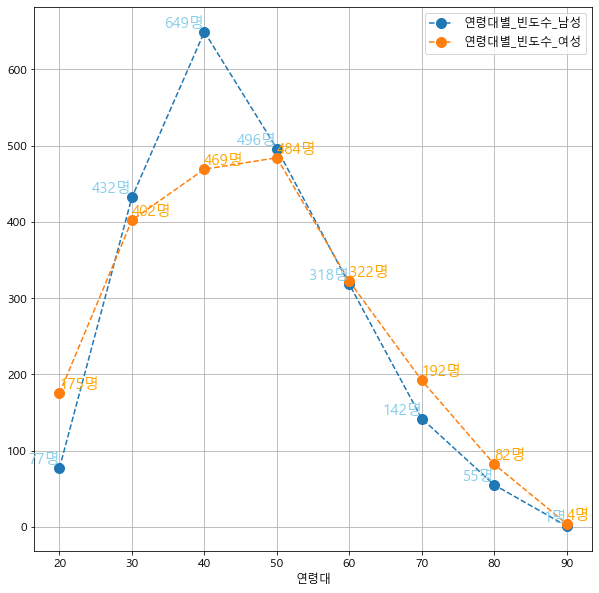

In [283]:
# 시각화

# 그래프 그리기
pivot_df.plot(marker='o',
             ms=10,
             ls='--')


# 그래프에 텍스트 넣기
for idx in pivot_df.index:    
    x = idx
    
    y_male = pivot_df.loc[idx, '연령대별_빈도수_남성']
    txt_male = str(pivot_df.loc[idx, '연령대별_빈도수_남성']) + '명'

    y_female = pivot_df.loc[idx, '연령대별_빈도수_여성']
    txt_female = str(pivot_df.loc[idx, '연령대별_빈도수_여성']) + '명'
    
    plt.text(x, y_male, txt_male,
            horizontalalignment='right',
            verticalalignment='bottom',
            fontsize=15,
            color='skyblue')
    
    plt.text(x, y_female, txt_female,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=15,
            color='orange')
plt.grid()

### 문제 08 ] 지역별 연령층 분포와 연령층별 지역비율

In [331]:
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [332]:
# 필요한 칼럼만 추출
region_age_df = want_columns_df[ ['태어난 연도', '7개 권역별 지역구분'] ]
region_age_df.head(10)

,태어난 연도,7개 권역별 지역구분
0,1936,1
1,1945,1
2,1948,1
3,1942,1
4,1923,1
5,1962,1
6,1963,1
7,2003,1
8,1927,1
9,1934,1


In [333]:
# '나이' 칼럼 구하고 '태어난 연도' 칼럼 지우기
region_age_df['나이'] = dt.datetime.now().year - region_age_df['태어난 연도'] + 1
region_age_df.drop(['태어난 연도'], axis=1, inplace=True)
region_age_df.head(10)

,7개 권역별 지역구분,나이
0,1,85
1,1,76
2,1,73
3,1,79
4,1,98
5,1,59
6,1,58
7,1,18
8,1,94
9,1,87


In [334]:
# 지역코드와 매칭되는 데이터프레임을 만들어서 병합
data = {
    '지역코드' : [1, 2, 3, 4, 5, 6, 7],
    '지역'                : ['서울', '수도권(인천/경기)', '부산/경남/울산', '대구/경북', 
                           '대전/충남', '강원/충북', '광주/전남/전북/제주도']
}


region_df = pd.DataFrame(data)
region_df

,지역코드,지역
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [335]:
# 병합하기
hangle_version_df = pd.merge(region_age_df, 
                             region_df, 
                             left_on='7개 권역별 지역구분', 
                             right_on='지역코드', 
                             how='left')

display( hangle_version_df.head(10) )


# 데이터 의미는 같지만 칼럼명이 같아 중복되는 칼럼을 제거
hangle_version_df.drop(['7개 권역별 지역구분'], axis=1, inplace=True)

display( hangle_version_df.head(10) )

,7개 권역별 지역구분,나이,지역코드,지역
0,1,85,1,서울
1,1,76,1,서울
2,1,73,1,서울
3,1,79,1,서울
4,1,98,1,서울
5,1,59,1,서울
6,1,58,1,서울
7,1,18,1,서울
8,1,94,1,서울
9,1,87,1,서울


,나이,지역코드,지역
0,85,1,서울
1,76,1,서울
2,73,1,서울
3,79,1,서울
4,98,1,서울
5,59,1,서울
6,58,1,서울
7,18,1,서울
8,94,1,서울
9,87,1,서울


In [342]:
# 나이가 30보다 작으면 청년층, 31~60이면 중년층, 61이상은 노년층인
# '연령층' 칼럼을 만들자

f1 = lambda x : '청년층' if x <= 30 else '중년층'
f2 = lambda y : '노년층' if y > 60 else f1(y)

hangle_version_df['연령층'] = hangle_version_df['나이'].apply(f2)

display(hangle_version_df.loc[40:50, :])

,나이,지역코드,지역,연령층
40,76,1,서울,노년층
41,46,1,서울,중년층
42,49,1,서울,중년층
43,47,1,서울,중년층
44,15,1,서울,청년층
45,15,1,서울,청년층
46,41,1,서울,중년층
47,67,1,서울,노년층
48,80,1,서울,노년층
49,66,1,서울,노년층


##### np.select(lsit, list, default) -> Series 리턴

In [393]:
jogun01 = hangle_version_df['나이'] <= 30
jogun02 = (hangle_version_df['나이'] > 30) & (hangle_version_df['나이'] < 60)
jogun03 = hangle_version_df['나이'] >= 60

condition01 = [jogun01, jogun02, jogun03]
condition02 = ['청년층', '중년층', '노년층']
hangle_version_df['연령층'] = np.select(condition01, condition02)

display(hangle_version_df.loc[40:50, :]) # 위 결과랑 똑같쥬?

,나이,지역코드,지역,연령층
40,76,1,서울,노년층
41,46,1,서울,중년층
42,49,1,서울,중년층
43,47,1,서울,중년층
44,15,1,서울,청년층
45,15,1,서울,청년층
46,41,1,서울,중년층
47,67,1,서울,노년층
48,80,1,서울,노년층
49,66,1,서울,노년층


In [360]:
# 지역과 연령층에대한 빈도분포를 확인하라
# 분석결과를 pivot으로 구성
# 지역을 인덱스로 연령층을 칼럼으로 나이를 값으로 사용
plot_df = hangle_version_df.pivot_table('나이', '지역', '연령층', aggfunc='count')
plot_df

연령층,노년층,중년층,청년층
지역,,,
강원/충북,567,352,261
광주/전남/전북/제주도,1283,845,621
대구/경북,973,525,376
대전/충남,591,433,331
부산/경남/울산,1189,816,559
서울,858,838,512
수도권(인천/경기),1227,1286,979


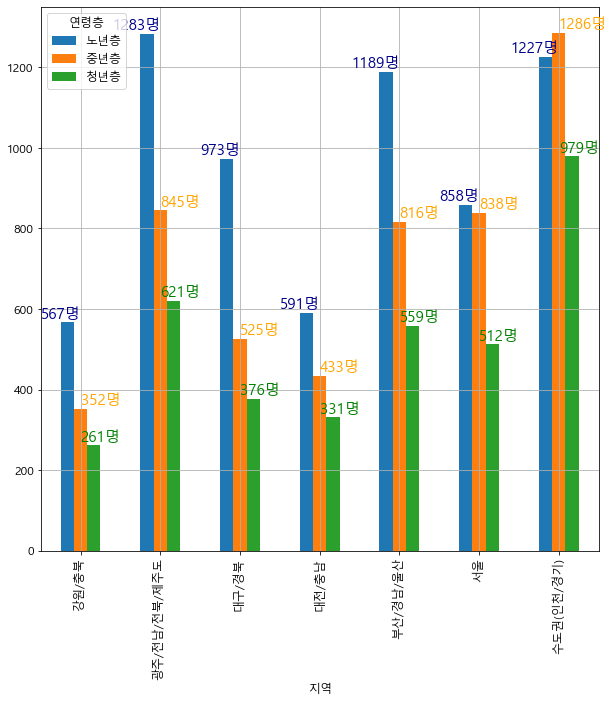

In [394]:
# 시각화

# 그래프 그리기
plot_df.plot.bar()

# 그래프에 텍스트 넣기
for x in range(0, 7):
    idx = plot_df.index[x]
    
    old_y = plot_df.loc[idx, '노년층']
    middle_y = plot_df.loc[idx, '중년층']
    young_y = plot_df.loc[idx, '청년층']
    
    old_txt = plot_df.loc[idx, '노년층'].astype(str) + '명'
    middle_txt = plot_df.loc[idx, '중년층'].astype(str) + '명'
    young_txt = plot_df.loc[idx, '청년층'].astype(str) + '명'
    
    plt.text(x, old_y, old_txt,
            horizontalalignment='right',
            verticalalignment='bottom',
            fontsize=15,
            color='darkblue')
    plt.text(x, middle_y, middle_txt,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=15,
            color='orange')
    plt.text(x, young_y, young_txt,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=15,
            color='green')

plt.grid()

Text(0.5, 1.0, '노년층')

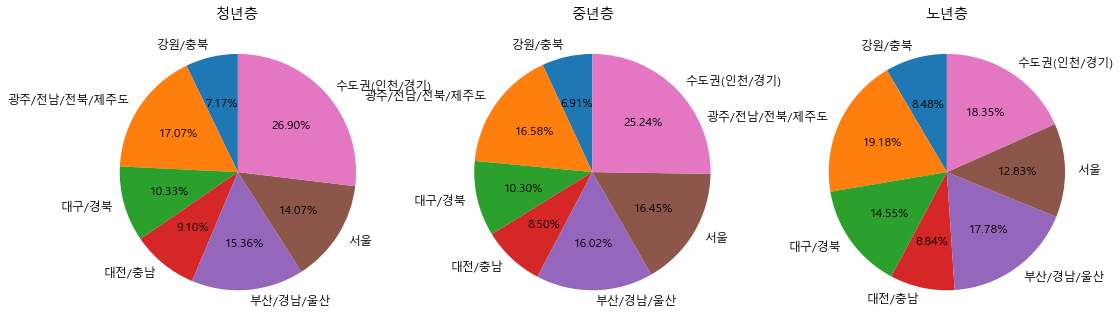

In [433]:
# 파이차트 그리기

# 그래프 크기 조정하기
plt.rcParams['figure.figsize'] = (18, 6)

# 파이차트
fig, axes = plt.subplots(1, 3)

plot_df['청년층'].plot.pie(ax=axes[0], autopct='%.2f%%', startangle=90)
axes[0].set(ylabel='')
axes[0].set_title('청년층')

plot_df['중년층'].plot.pie(ax=axes[1], autopct='%.2f%%', startangle=90)
axes[1].set(ylabel='')
axes[1].set_title('중년층')

plot_df['노년층'].plot.pie(ax=axes[2], autopct='%.2f%%', startangle=90)
axes[2].set(ylabel='')
axes[2].set_title('노년층')